# Esercitazione 5: Interpolazione polinomiale

In [5]:
cd ('./esercitazioni/esercitazione_5')

Error using cd
Unable to change current folder to '/Users/alessioarcara/Downloads/universita/mnc2023/esercitazioni/esercitazione_5/./esercitazioni/esercitazione_5' (Name is nonexistent or not a folder).

## A. Interpolazione polinomiale di dati nella forma di Newton

Si completi lo script `spolint_newt_dati.m` per l’interpolazione polinomiale con base di Newton del set di dati dataset1.txt. Lo script faccia le seguenti cose:
* legga il file di dati;
* calcoli la matrice N per il sistema lineare Nc = y;
* risolva il sistema lineare, cioè trovi i coefficienti c del polinomio interpolante nella base di Newton;
* faccia il grafico dei punti dati e del polinomio interpolante (valutazione su un insieme di punti dell’intervallo).

Sugg. si utilizzino le function `newton.m`, `lsolve.m` e `newtval.m` presenti nella cartella.


In [107]:
dati = load("dataset1.txt");
x = dati(:, 1);
y = dati(:, 2);
n = length(x);

In [108]:
L = newton(n-1,x,x);
y = lsolve(L, y);

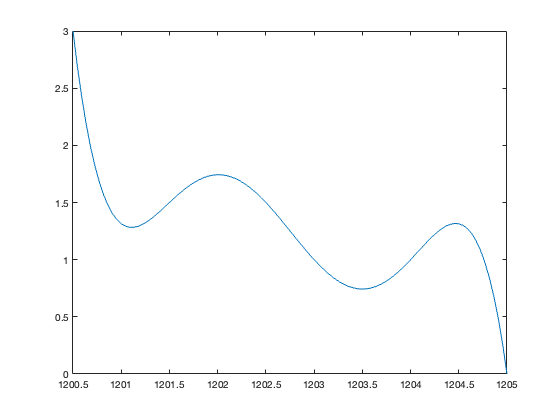

In [109]:
xv = linspace(x(1), x(end), 100);
yv = newtval(y, x, xv);
plot(xv, yv)

## B. Interpolazione polinomiale di dati nella forma di Lagrange
Si completi lo script `spolint_lagr_dati.m` (simile al precedente), ma che utilizzi la base di Lagrange. 

Sugg. per valutare il polinomio interpolante nella base di Lagrange si utilizzi la function `lagrval2.m` presente nella cartella.

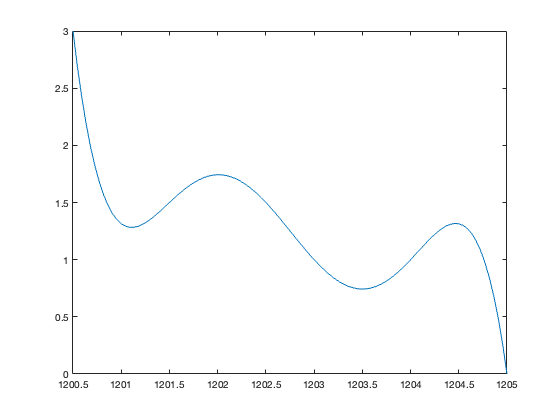

In [110]:
y_points = lagrval2(y, x, xv);
plot(xv, yv)

## H. Esercizio di verifica (su interpolazione polinomiale di funzioni nella base di Bernstein)
Si realizzi uno script `spolint_bern_fun.m` simile a `spolint_lagr_fun.m`, ma che utilizzi la forma di Bernstein. 

Sugg. per definire la matrice del sistema lineare si usi la function `bernst.m` e per valutare il polinomio interpolante si utilizzi la function `decast.m` presenti nella cartella.

bs = 6x6 double
1.0e+16 *

   -0.2483    1.2426   -2.4873    2.4894   -1.2457    0.2494
   -0.2494    1.2478   -2.4977    2.4997   -1.2509    0.2504
   -0.2504    1.2530   -2.5081    2.5102   -1.2561    0.2514
   -0.2509    1.2556   -2.5133    2.5154   -1.2587    0.2520
   -0.2520    1.2608   -2.5238    2.5259   -1.2640    0.2530
   -0.2530    1.2661   -2.5343    2.5364   -1.2692    0.2541

yv = 1x100 double
1.0e+15 *

   -2.4831   -2.4837   -2.4842   -2.4847   -2.4852   -2.4858   -2.4863   -2.4868   -2.4873   -2.4878   -2.4883   -2.4888   -2.4894   -2.4899   -2.4904   -2.4909   -2.4914   -2.4919   -2.4923   -2.4928   -2.4933   -2.4938   -2.4943   -2.4948   -2.4952   -2.4957   -2.4962   -2.4966   -2.4971   -2.4976
...

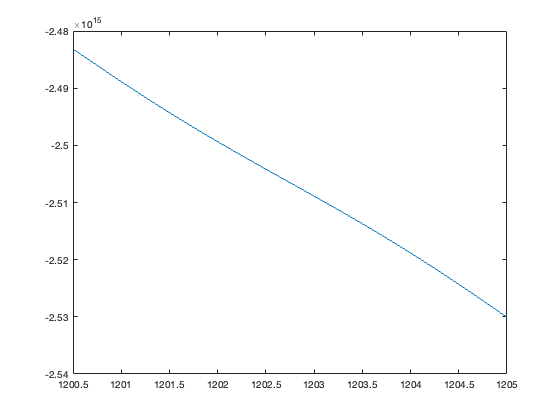

In [138]:
bs = bernst(n-1,x,0,1)
yv = decast(bs,xv,x(1),x(end))
plot(xv,yv)

## C. Interpolazione polinomiale di funzione
Si completi lo script `spolint_lagr_fun.m` per implementare l’interpolazione polinomiale di grado $n$ di una funzione $f(x), x\in[a,b]$ a partire da $(x_i,f(x_i))_{i=0,\ldots,n}$ utilizzando la base di Lagrange:
1. prevedere due differenti set di punti $x_i$ di interpolazione (equispaziati e di Chebyshev; si veda la function chebyshev);
2. si rappresentino graficamente: la funzione test, i punti $(x_i,f(x_i))_{i=0,\ldots,n}$ di interpolazione e la funzione polinomiale interpolante;
3. calcolare e stampare una stima del max. dell’errore di interpolazione in valore assoluto
$$ max |f(x)-p(x)| x\in[a,b]$$
utilizzando i valori calcolati della funzione e dell’interpolante.
4. visionare il grafico dell’errore di interpolazione in scala logaritmica.
Si consideri la funzione test di Runge (function `runge.m`): 
$$f(x) = 1/(1 + x^2 ) x\in[−5, 5]$$
